In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 13 13:49:13 2018

@author: Cerx
"""

import numpy as np
import matplotlib.pyplot as plt

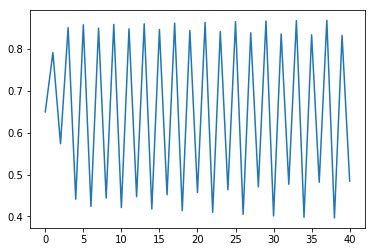

In [2]:
def f(x,r):
    return 4*r*x*(1-x)

n = list(range(41))
y = []
x0 = .65
r = .87
x_temp = x0

for i in n:
    y.append(x_temp)
    x_temp = f(x_temp,r)

plt.figure('x(n) vs n')
plt.plot(n,y)
plt.show()

In [3]:
y1 = []
y2 = []
y4 = []
x = np.linspace(0,1,1001)
for i in x:
    y1.append(f(i,r))
    y2.append(f(f(i,r),r))
    y4.append(f(f(f(f(i,r),r),r),r))
plt.figure('n-fold iteration of x in f(x)')
plt.plot(x,x, label = 'straight line')
plt.plot(x,y1, label = 'one-fold')
plt.plot(x,y2, label = 'two-fold')
plt.plot(x,y4, label = 'four-fold')
plt.legend()
plt.show()

In [7]:
plt.figure('Feigenbaum')#slow method using plot
xn = x0
x_space = []
rN = 200 #rN = 200, 40 min render
xN = 1000
e = 1e-6
for i in np.linspace(0,1,rN + 1):
    x_space.clear()
    for j in range(xN + 1):
        x_temp = xn
        xn = f(xn,i)
        #let's only add to x_space if the difference of x_temp and xn is large
        if abs(xn-x_temp)>e:
            x_space.append(xn)
        else:
            continue
    #check x_space length
    x_length = len(x_space)
    if x_length <= 100:
        for k in range(x_length-1):
            x_space.pop(0)
            #remove first 100 values
    else:
        for k in range(100):
            x_space.pop(0)
            #remove first 100 values
    for space in x_space:
        plt.plot(i,space, c='r', marker = ',')
    xn = x0
    #I'm calculating xN*rN points repeatedply. Must shorten somehow.
plt.show()

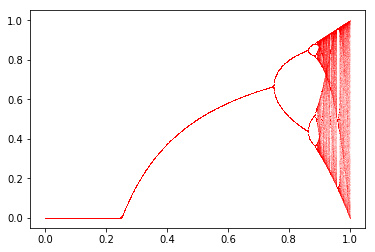

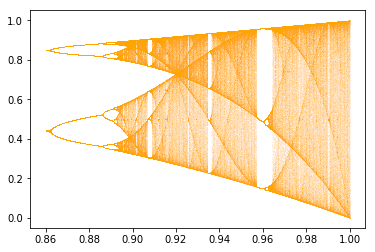

In [3]:
plt.figure('Feigenbaum x vs r')#fast method using scatter
xn = x0
x_space = []
for i in np.linspace(0,1,1001):
    x_space.clear()
    for k in range(101):
        xn = f(xn,i)
    for j in range(1001):
        xn = f(xn,i)
        x_space.append(xn)
#    for space in x_space:
#        plt.plot(i,space, c='r', marker = ",")
    plt.scatter(i*np.ones(len(x_space)),x_space, s = .1, c='r', marker = ".", linewidths = 0)#originally s = .5
    xn = x0

plt.figure('Feigenbaum zoomed')
xn = x0
x_space = []
for i in np.linspace(.86,1,1001):
    x_space.clear()
    for k in range(101):
        xn = f(xn,i)
    for j in range(1001):
        xn = f(xn,i)
        x_space.append(xn)
#    for space in x_space:
#        plt.plot(i,space, c='r', marker = ","
    plt.scatter(i*np.ones(len(x_space)),x_space, s = .1, c='orange', marker = ".", linewidths = 0)#originally s = .5
    xn = x0

In [25]:
plt.figure('Parabola')
parabola = []
sr = .9642
#r = .874640
#r = .6
for i in x:
    parabola.append(f(i,r))
plt.plot(x,x, label = 'two-fold')
plt.plot(x,parabola, label = 'four-fold')
count = 0
vertex = f(.5,r)
intersection = 1 - (1/(4*r))
xin = r

i = []
j = []

def f_inv(x,r):
    if x < vertex:    
        return (1 - np.sqrt(1 - x/r))/2
    else:
        return (1 + np.sqrt(1 - x/r))/2

while count < 240:
    
    xout = f(xin,r)
    
    #go up or down
    if xin < intersection:
        #up
        #print('up')
        i = xin*np.ones(100)
        j = np.linspace(xin,xout,100)
        plt.plot(i,j, marker = ',', color = 'k')
        
        #print('right')
        j = xout*np.ones(100)
        i = np.linspace(xin,xout,100)
        plt.plot(i,j, marker = ',', color = 'k')
        
    else:
        #down
        #print('down')
        i = xin*np.ones(100)
        j = np.linspace(xin,xout,100)
        plt.plot(i,j, marker = ',', color = 'k')
        
        #print('left')
        j = xout*np.ones(100)
        i = np.linspace(xin,xout,100)
        plt.plot(i,j, marker = ',', color = 'k')
    xin = xout
    
    count += 1

NameError: name 'x' is not defined